<a href="https://colab.research.google.com/github/AKACHI-4/AgriPulse/blob/main/Indian_Agricultural_Productivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Indian Agricultural Crop Yield Predictions


## Importing Libraries


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('crop_yield.csv')


In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [ ]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
18471,Ginger,2000,Kharif,Manipur,1140.0,1890,1969.7,111913.80,296.40,1.672857
4825,Ragi,2016,Rabi,Puducherry,6.0,10,1391.3,919.50,2.10,1.670000
5049,Other Cereals,2016,Rabi,Tamil Nadu,4060.0,54,912.4,622195.00,1421.00,0.095455
7856,Moong(Green Gram),2001,Kharif,Uttarakhand,67.0,32,1541.3,6842.71,17.42,0.342500
14290,Sesamum,2015,Kharif,Gujarat,152565.0,55293,584.3,24091539.15,50346.45,0.353667


In [ ]:
print("Shape of the dataset : ", df.shape)

Shape of the dataset :  (19689, 10)


# Preprocessing of the dataset


In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
# to check the unique values
for i in df.columns:
    print()
    print(set(df[i].tolist()))
    print()


{'Cotton(lint)', 'Urad', 'Arecanut', 'Banana', 'Barley', 'Cashewnut', 'Ragi', 'Mesta', 'Guar seed', 'Coriander', 'Gram', 'Sannhamp', 'Peas & beans (Pulses)', 'Onion', 'Coconut ', 'Other Kharif pulses', 'Tobacco', 'Bajra', 'Oilseeds total', 'Rice', 'Small millets', 'Jowar', 'Tapioca', 'Cowpea(Lobia)', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Soyabean', 'Turmeric', 'Linseed', 'Other Summer Pulses', 'Rapeseed &Mustard', 'Masoor', 'Castor seed', 'Moong(Green Gram)', 'Dry chillies', 'Sesamum', 'Black pepper', 'Other  Rabi pulses', 'Garlic', 'Ginger', 'Groundnut', 'Niger seed', 'Maize', 'Horse-gram', 'Potato', 'Khesari', 'Other Cereals', 'Wheat', 'Jute', 'Cardamom', 'Sunflower', 'Moth', 'other oilseeds', 'Safflower'}


{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}


{'Rabi       ', 'Kharif     ', 'Whole Year ', 'Autumn     ', 'Summer     ', 'Winter     '}


{'Puducherry', 'Delhi', 'Telangana

In [ ]:
# Check the duplicates record
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


# Visualization


In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Annual_Rainfall',
    y='Yield',
    title='Annual Rainfall vs Yield',
    labels={'Annual_Rainfall': 'Annual Rainfall (mm)', 'Yield': 'Crop Yield (kg/ha)'},
    color_discrete_sequence=['#636EFA']
)

fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    template='plotly_white'
)

fig.show()


# Year wise analysis of agricultural production


In [ ]:
df_year = df[df['Crop_Year'] != 2020]  # As the data of 2020 is incomplete

In [ ]:
year_yield = df_year.groupby('Crop_Year').sum()
year_yield

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447
2002,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.427858e+08,12409349456,1.040622e+06,1.351753e+10,3.569644e+07,65734.814831
2003,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.496968e+08,12313711969,1.135610e+06,1.481699e+10,3.592724e+07,67039.368873
2004,ArecanutArhar/TurBajraBajraBajraBananaBlack pe...,Whole Year Kharif Kharif Rabi Su...,KarnatakaKarnatakaKarnatakaKarnatakaKarnatakaK...,1.480245e+08,13817065380,1.141189e+06,1.603697e+10,3.108514e+07,63905.917053
2005,ArecanutArhar/TurBajraBajraBananaCashewnutCast...,Whole Year Kharif Kharif Rabi Wh...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.479183e+08,14951210018,1.185828e+06,1.773836e+10,3.106285e+07,70140.586280


In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the trace (line and markers)
fig.add_trace(go.Scatter(
    x=year_yield.index,          # X-axis: Year (assumed from the DataFrame index)
    y=year_yield['Yield'],       # Y-axis: Yield values
    mode='lines+markers',        # Show both lines and markers
    line=dict(color='blue', dash='dash'),  # Blue dashed line
    marker=dict(size=12, color='red', symbol='circle'),  # Yellow circular markers
    name='Yield'
))

# Update the layout to set titles and labels
fig.update_layout(
    title="Measure of Yield over the Year",
    xaxis_title="Year",
    yaxis_title="Yield",
    template="plotly_white",  # Use a clean white background
    width=1400,                # Optional: specify plot width
    height=400                # Optional: specify plot height
)

# Display the plot
fig.show()


It is evident from the data that crop yield improved steadily until around 2014; however, a declining trend emerges afterward.

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add a bar plot
fig.add_trace(go.Bar(
    x=year_yield.index,
    y=year_yield['Area'],
    marker_color='skyblue',      # Bar color
    marker_line_color='black',   # Border color
    marker_line_width=1.5        # Border thickness
))

# Update layout
fig.update_layout(
    title='Area Under Cultivation Over the Years',
    xaxis_title='Year',
    yaxis_title='Area',
    title_font=dict(size=20, color='black', family='Arial Black'),
    xaxis_tickangle=-45,  # Rotate x-axis labels
    plot_bgcolor='white',
    width=1400,
    height=500,
    bargap=0.3,           # Space between bars
    yaxis=dict(gridcolor='lightgrey')  # Light grey gridlines
)

# Show the plot
fig.show()


It can be observed that the area under cultivation has increased substantially. Either with the help of fertilizer and more irrigation fallow land is now under cultivation or area under forest is used for agriculture.


In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=year_yield.index,
    y=year_yield['Fertilizer'],
    marker_color='limegreen',  # Set bar color
    marker_line_color='black', # Set bar border color
    marker_line_width=1.5      # Border thickness
))

# Update layout
fig.update_layout(
    title='Use of Fertilizer Over the Years',
    xaxis_title='Year',
    yaxis_title='Fertilizer Usage',
    title_font=dict(size=20, color='black', family='Arial Black'),
    xaxis_tickangle=-45,  # Rotate x-axis labels
    plot_bgcolor='white',  # White background
    width=1400,
    height=500,
    bargap=0.3,  # Space between bars
    yaxis=dict(gridcolor='lightgrey')  # Grid lines
)

# Show the plot
fig.show()


The use of Fertilizer in the fields is increasing


In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add a scatter plot (line + markers)
fig.add_trace(go.Scatter(
    x=year_yield.index,
    y=year_yield['Pesticide'],
    mode='lines+markers',  # Lines and points both
    line=dict(color='red', dash='dash'),  # Red dashed line
    marker=dict(color='cyan', size=10, line=dict(color='black', width=1)),  # Cyan markers with black border
    name='Pesticide Usage'
))

# Update layout
fig.update_layout(
    title='Use of Pesticide Over the Years',
    xaxis_title='Year',
    yaxis_title='Pesticide Usage',
    title_font=dict(size=20, color='black', family='Arial Black'),
    xaxis_tickangle=-45,  # Rotate x-axis labels
    plot_bgcolor='white',
    width=1400,
    height=500,
    yaxis=dict(gridcolor='lightgrey')  # Light grey gridlines
)

# Show the plot
fig.show()


# State wise analysis of agricultural production


In [ ]:
import plotly.express as px

# Group by State and sum
df_state = df.groupby('State').sum(numeric_only=True)
df_state.sort_values(by='Yield', inplace=True, ascending=False)

# Create a Pie Chart
fig = px.pie(
    df_state,
    names=df_state.index,       # State names
    values='Yield',             # Corresponding Yield values
    title='State-wise Yield Distribution',
    color_discrete_sequence=px.colors.sequential.Blues,  # Nice blue color palette
    hole=0.4                    # Donut chart (optional: set to 0 for full pie)
)

# Update layout for better look
fig.update_layout(
    title_font=dict(size=24, family='Arial Black'),
    legend_title='States',
    legend=dict(
        orientation="v",
        x=1,
        y=0.5
    )
)

# Show the plot
fig.show()


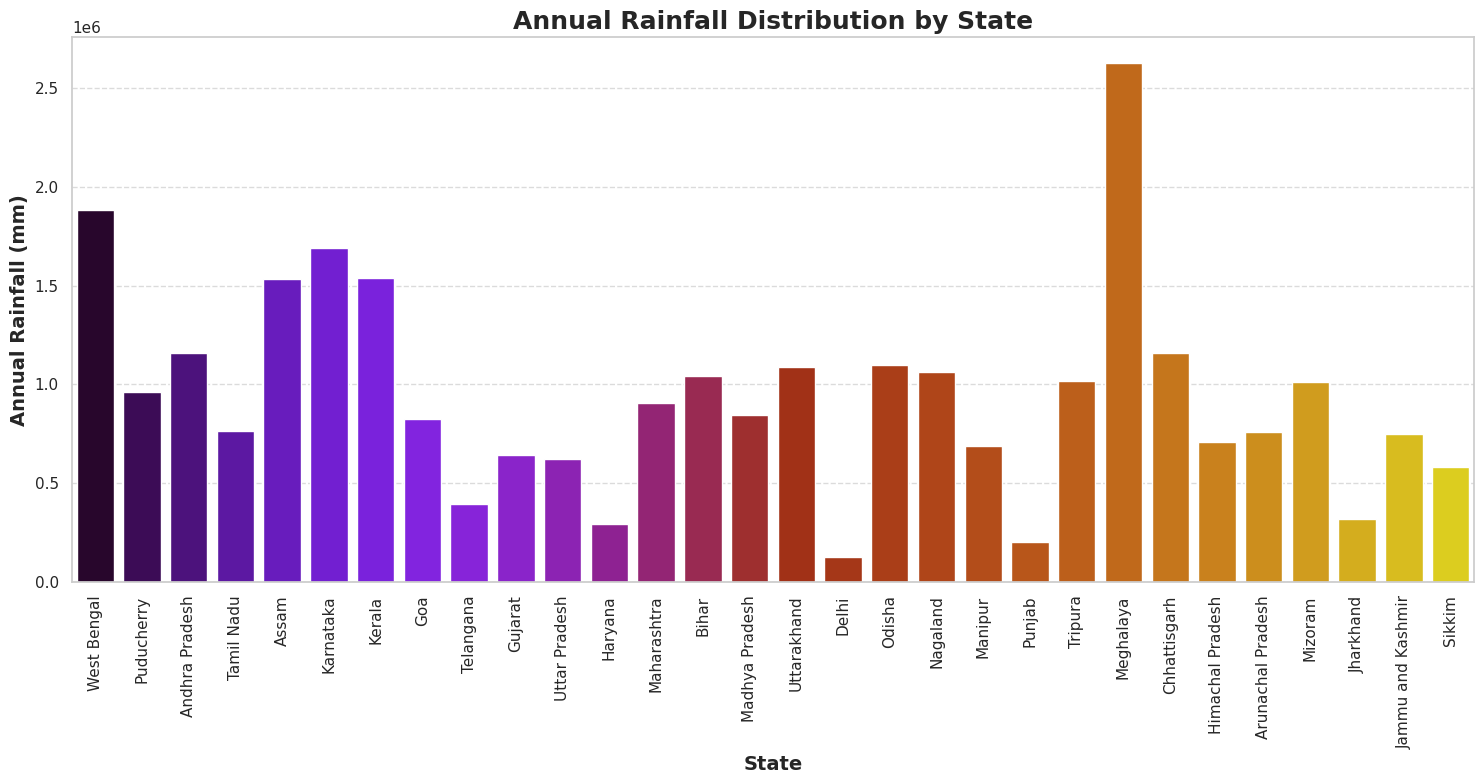

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 8))

# Draw a bar plot
sns.barplot(x=df_state.index, y=df_state['Annual_Rainfall'], palette='gnuplot')

# Add labels and title
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Annual Rainfall (mm)', fontsize=14, fontweight='bold')
plt.title('Annual Rainfall Distribution by State', fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df_state,
    x=df_state.index,             # States on x-axis
    y='Annual_Rainfall',           # Rainfall on y-axis
    color='Yield',                 # Color based on Yield values
    color_continuous_scale='Rainbow',  # 'rainbow' color scale
    title='Annual Rainfall Across the States',
    size_max=10
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Annual Rainfall (mm)',
    title_font=dict(size=22, family='Arial Black'),
    xaxis_tickangle=-90,             # Rotate x-axis labels
    plot_bgcolor='white',
)

fig.show()


In [ ]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(
    df_state,
    x=df_state.index,          # States on x-axis
    y='Fertilizer',             # Fertilizer usage on y-axis
    color='Yield',              # Color based on Yield
    color_continuous_scale='viridis',  # Use a valid Plotly colorscale
    title='Use of Fertilizer in Different States'
)

# Update layout
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Fertilizer Usage',
    title_font=dict(size=22, family='Arial Black'),
    xaxis_tickangle=-90,  # Rotate labels
    plot_bgcolor='white'
)

fig.show()


### Observations:

- Annual Rainfall is highest in Chattisgarh but the yield is not the highest.
- West Bengal has the maximum yield
- Uttar Pradesh, Haryana, Maharashtra are using high amount of fertilizer but yield is not high reason can be low annual rainfall


# Season wise analysis


In [ ]:
import plotly.express as px

# Remove "Whole Year" season
df_Seas = df[df['Season'] != 'Whole Year ']

# Group by Season and sum up values
df_season = df_Seas.groupby('Season').sum()




In [ ]:
# Plot Pie chart for Yield by Season
fig = px.pie(
    df_season,
    names=df_season.index,   # Season names
    values='Yield',          # Sum of Yield
    title='Season-wise Yield Distribution',
    hole=0.4,                # To make it a donut chart (optional)
    color_discrete_sequence=px.colors.sequential.Plasma_r  # Nice color sequence
)

# Update layout
fig.update_layout(
    title_font=dict(size=22, family='Arial Black'),
    legend_title='Season',
    legend_font=dict(size=14),
    plot_bgcolor='white'
)

fig.show()

## Observations:

- Area under cultivation in Kharif season is highest, second is Rabi season
- Crops in autumn, summer are not grown over large area
- Yield in India is maximum in Kharif season


# Crop wise Analysis


In [ ]:
# Where the Yield is zero
df_yz = df[df['Yield'] == 0]
df_yz.shape

(112, 10)

In [ ]:
df_yz.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
92,Cardamom,1997,Whole Year,West Bengal,2674.0,7,1852.9,254484.58,828.94,0.0
125,Sunflower,1997,Whole Year,West Bengal,278.0,1,1852.9,26457.26,86.18,0.0
1058,Soyabean,2002,Kharif,Andhra Pradesh,41284.0,0,648.1,3908356.28,10321.00,0.0
1134,other oilseeds,2002,Whole Year,Kerala,2253.0,0,2511.2,213291.51,563.25,0.0
1135,Arecanut,2002,Whole Year,Tamil Nadu,4956.0,0,315.9,469184.52,1239.00,0.0


In [ ]:
import plotly.express as px

fig = px.strip(
    df_yz,
    x="Crop",
    y="State",
    color="State",
    color_discrete_sequence=px.colors.sequential.Inferno,
    title="States and the Crops Where Yield is Zero",
    height=800,
    width=1400
)

fig.update_layout(
    title_font_size=24,
    title_x=0.5,  # center the title
    xaxis_title="Crop",
    yaxis_title="State",
    xaxis_tickangle=90,  # Rotate x labels
    plot_bgcolor='white',
)

fig.show()


In [ ]:
df_ynz = df[df['Yield'] > 0]  # where yield is more than zero
df_crop = df_ynz.groupby('Crop').sum()
df_crop.head(5)

,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop,,,,,,,,,
Arecanut,321347,Whole Year Whole Year Whole Year Whole Year Wh...,AssamKarnatakaKeralaMeghalayaWest BengalPuduch...,8765157.86,39144261,341457.804545,1.226556e+09,2.449481e+06,335.928941
Arhar/Tur,1020541,Kharif Kharif Kharif Whole Year Kh...,AssamKarnatakaMeghalayaWest BengalAssamKarnata...,82353572.99,60913833,710307.805185,1.121027e+10,2.280705e+07,491.412661
Bajra,1052589,Kharif Summer Kharif Kharif Kh...,KarnatakaKarnatakaWest BengalPuducherryKarnata...,93358103.60,118137047,556674.757956,1.205114e+10,2.465983e+07,1271.990091
Banana,488061,Whole Year Whole Year Whole Year Whole Year Wh...,MeghalayaAssamGoaKeralaMeghalayaAssamGoaKerala...,7127320.69,226471979,419995.577760,9.805713e+08,1.916819e+06,6578.526324
Barley,596557,Whole Year Rabi Rabi Rabi Ra...,West BengalWest BengalWest BengalWest BengalWe...,9270084.39,19498687,347472.225099,1.190739e+09,2.472432e+06,473.875395


In [ ]:
import plotly.express as px

# Grouped data already created
# df_crop = df_ynz.groupby('Crop').sum()

# Sort and select top 5 crops
top5_crops = df_crop.sort_values(by='Yield', ascending=False).head(5)

# Draw pie chart
fig = px.pie(
    top5_crops,
    names=top5_crops.index,
    values='Yield',
    title='Top 5 Crops by Yield (Yield > 0)',
    color_discrete_sequence=px.colors.sequential.Magma
)

fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title_font_size=24,
    title_x=0.5  # Center the title
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Create line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_crop.index,
    y=df_crop['Fertilizer'],
    mode='lines+markers',  # Line + points
    line=dict(color='red', dash='dash'),  # Red dashed line
    marker=dict(color='cyan', size=10, symbol='circle'),  # Cyan markers
    name='Fertilizer Usage'
))

# Update layout
fig.update_layout(
    title='Use of Fertilizer in Different Crops',
    xaxis_title='Crops',
    yaxis_title='Fertilizer',
    title_font_size=24,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    xaxis_tickangle=90,  # Rotate x-axis labels
    font=dict(size=14),
    width=1400,
    height=500
)

# Show plot
fig.show()


### The amount of Fertilizer used is maximum in Rice Crop

### The second crop to use more fertilizer is Wheat crop


In [ ]:
import plotly.graph_objects as go

# Create line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_crop.index,
    y=df_crop['Area'],
    mode='lines+markers',  # Line + points
    line=dict(color='indigo', dash='dash'),  # Indigo dashed line
    marker=dict(color='fuchsia', size=10, symbol='circle'),  # Fuchsia markers
    name='Area under Cultivation'
))

# Update layout
fig.update_layout(
    title='Area Under Cultivation for Different Crops',
    xaxis_title='Crops',
    yaxis_title='Area under Cultivation',
    title_font_size=24,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    xaxis_tickangle=90,  # Rotate x-axis labels
    font=dict(size=14),
    width=1000,
    height=500
)

# Show plot
fig.show()


#### Area under cultivation is larger for Rice and Wheat crops


### Checking the co-relation in the dataset using heatmap


In [ ]:
import plotly.express as px

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Create a heatmap using Plotly
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect="auto",
    title='Correlation Heatmap of Dataset (Numeric Columns Only)'
)

fig.update_layout(
    title_x=0.5,
    width=1400,
    height=600,
    font=dict(size=12)
)

fig.show()


Fertilizer and Pesticide are showing the same corelation. Hence, have to drop one column to avoid Multicollinearity


# Modelling


In [ ]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year', 'Pesticide'], axis=1)

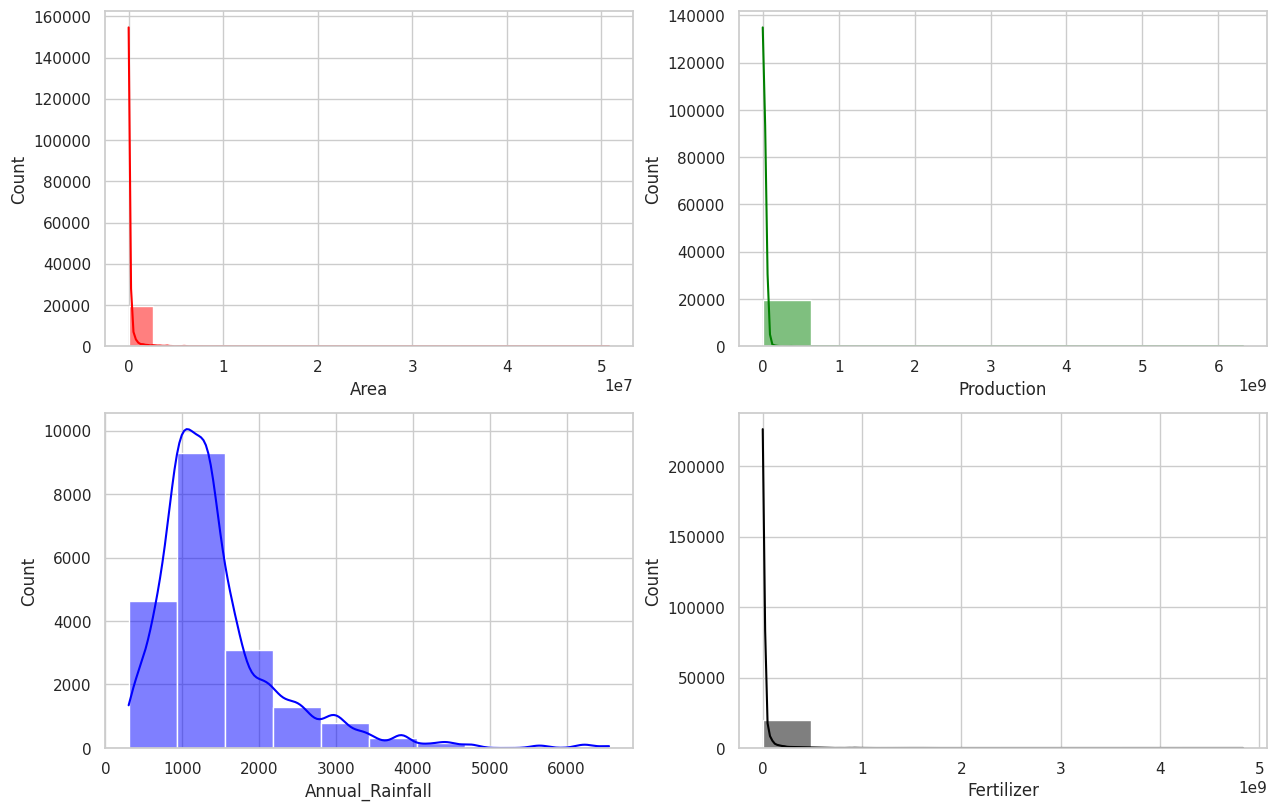

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(df1['Area'], bins=20, color='red',
             kde=True)  # kde=True for density curve

plt.subplot(4, 2, 2)
sns.histplot(df1['Production'], bins=10, color='green', kde=True)

plt.subplot(4, 2, 3)
sns.histplot(df1['Annual_Rainfall'], bins=10, color='blue', kde=True)

plt.subplot(4, 2, 4)
sns.histplot(df1['Fertilizer'], bins=10, color='black', kde=True)

plt.show()

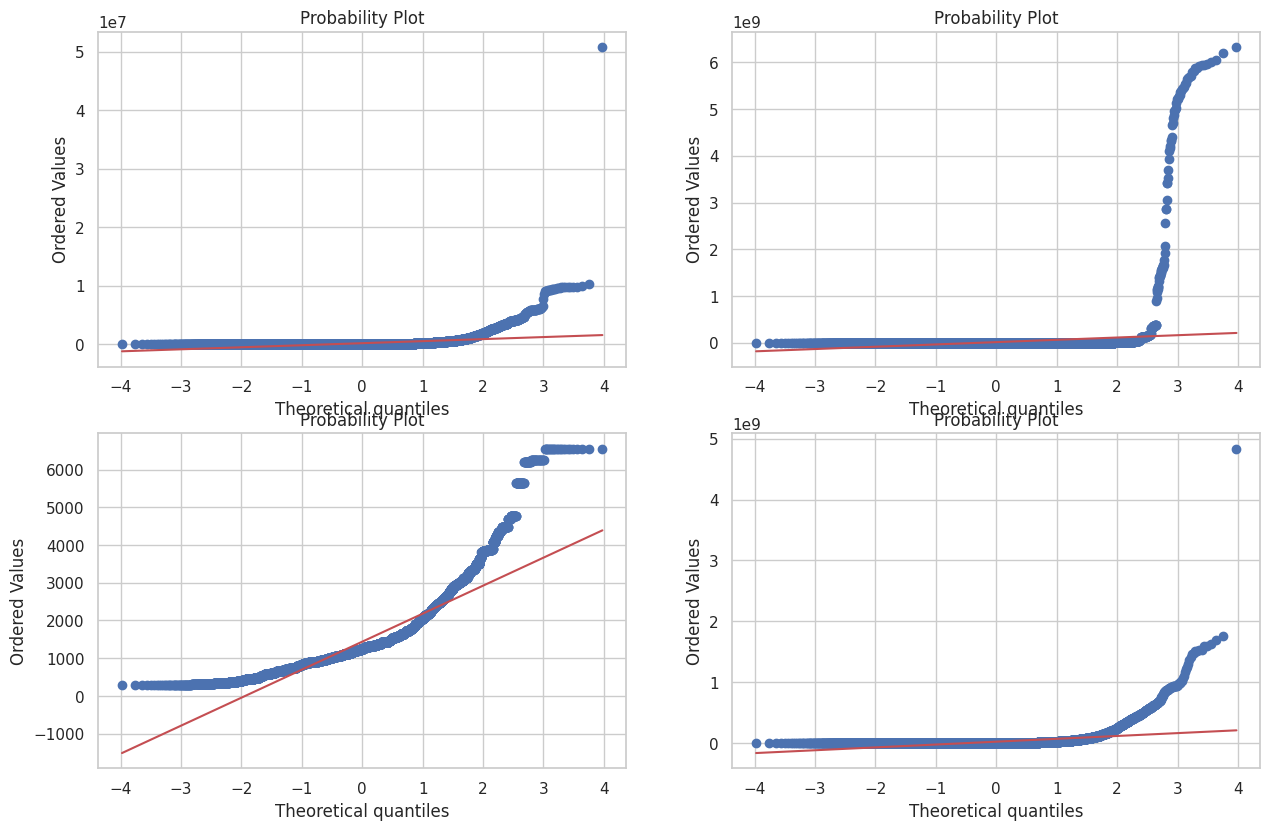

In [ ]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
stats.probplot(df1['Area'], dist='norm', plot=plt)
plt.subplot(4, 2, 2)
stats.probplot(df1['Production'], dist='norm', plot=plt)
plt.subplot(4, 2, 3)
stats.probplot(df1['Annual_Rainfall'], dist='norm', plot=plt)
plt.subplot(4, 2, 4)
stats.probplot(df1['Fertilizer'], dist='norm', plot=plt)
plt.show()

### Data distribution have right skewness - to remove skewness using transformation approach

The algorithm is more likely to be biased when the data distribution is skewed


# One-Hot Encoding


In [ ]:
category_columns = df1.select_dtypes(include=['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [ ]:
df1 = pd.get_dummies(df1, columns=category_columns, drop_first=True)

In [ ]:
df1.shape

(19689, 93)

In [ ]:
df1.head()

,Area,Production,Annual_Rainfall,Fertilizer,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,0.796087,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,0.710435,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,0.238333,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,5238.051739,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,0.420909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Split the data into dependent and independent variable


In [ ]:
x = df1.drop(['Yield'], axis=1)
y = df1[['Yield']]

In [ ]:
print(x.shape)
y.shape

(19689, 92)


(19689, 1)

In [ ]:
x.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.0,56708,2051.4,7024878.38,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6637.0,4685,2051.4,631643.29,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,796.0,22,2051.4,75755.32,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,19656.0,126905000,2051.4,1870661.52,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1739.0,794,2051.4,165500.63,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.head()

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909


### Splitting the data set into train and test set


In [ ]:
# split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15751, 92), (3938, 92), (15751, 1), (3938, 1))

### Power Transformation using the method 'Yeo-Johnson'


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
x_train_transform1 = pt.fit_transform(x_train)  # Fit on train
x_test_transform1 = pt.transform(x_test)        # Only transform test


In [ ]:
from sklearn.preprocessing import PowerTransformer
import pickle

# Retrain scaler
pt = PowerTransformer(method='yeo-johnson')
pt.fit(x_train)   # only fit, not transform

# Save the scaler
pickle.dump(pt, open('scaler.pkl', 'wb'))
print("Scaler saved successfully ✅")


Scaler saved successfully ✅


In [ ]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

,Area,Production,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,-1.075788,-0.715962,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.522011,-1.187932,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-1.239694,-1.428779,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.247029,0.197346,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,1.485555,0.978650,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


### After Transformation, there is no need for Standardization of the data


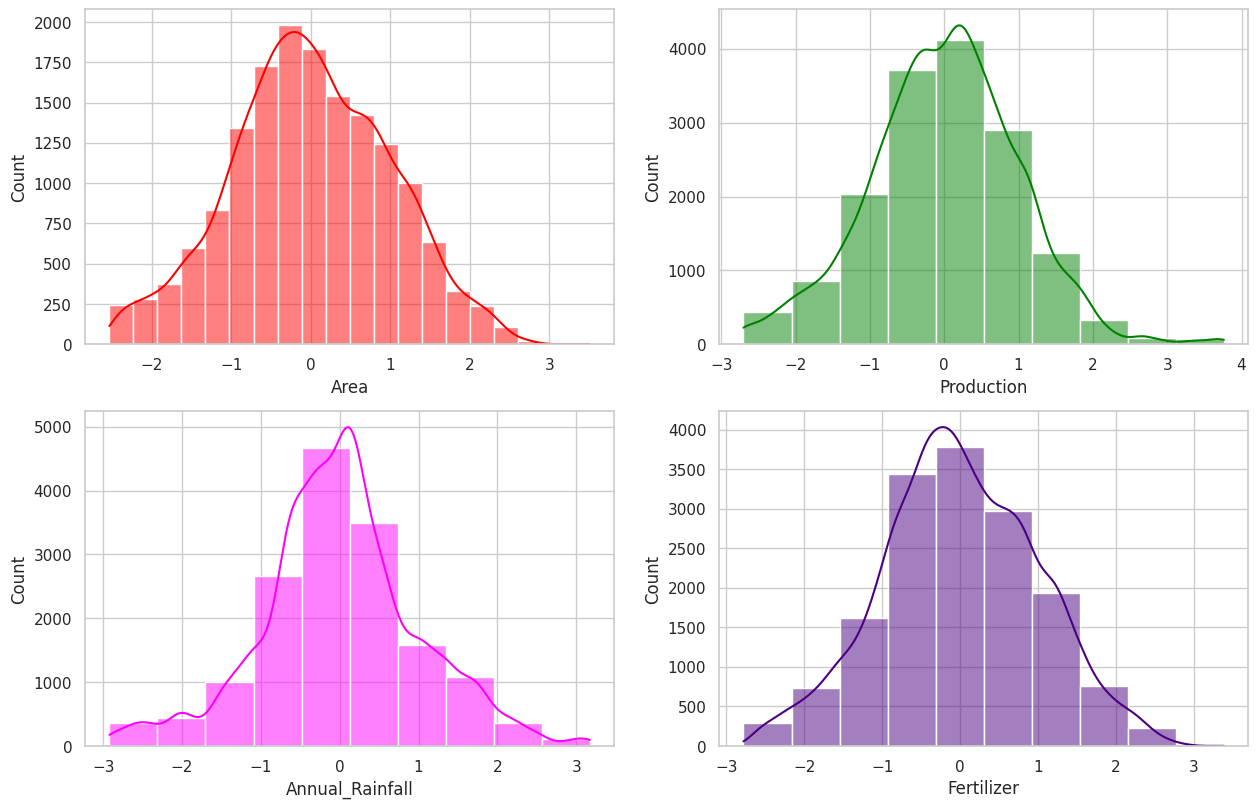

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.histplot(df_trans['Area'], bins=20, color='red', kde=True)

plt.subplot(4, 2, 2)
sns.histplot(df_trans['Production'], bins=10, color='green', kde=True)

plt.subplot(4, 2, 3)
sns.histplot(df_trans['Annual_Rainfall'], bins=10, color='fuchsia', kde=True)

plt.subplot(4, 2, 4)
sns.histplot(df_trans['Fertilizer'], bins=10, color='indigo', kde=True)

plt.show()

## Viewing the Q-Q Plot after the Transformation


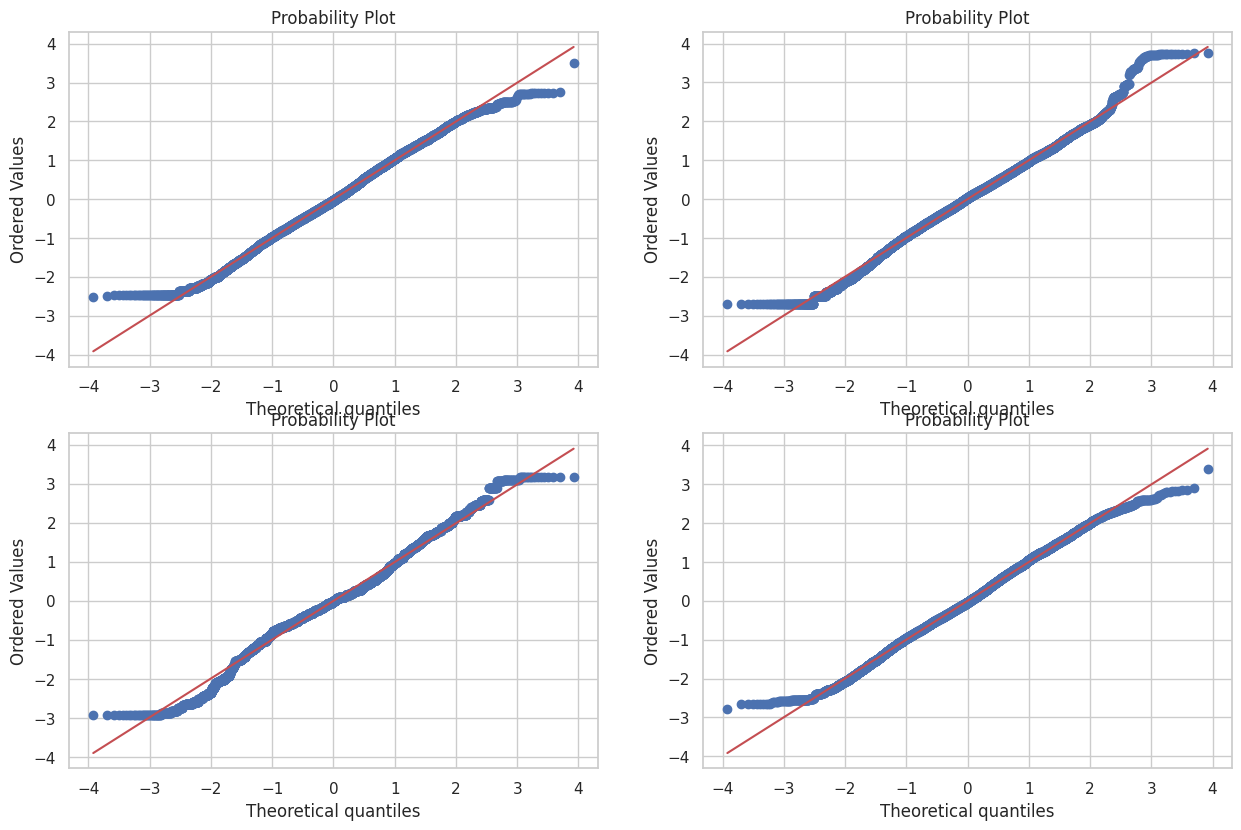

In [ ]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
stats.probplot(df_trans['Area'], dist='norm', plot=plt)
plt.subplot(4, 2, 2)
stats.probplot(df_trans['Production'], dist='norm', plot=plt)
plt.subplot(4, 2, 3)
stats.probplot(df_trans['Annual_Rainfall'], dist='norm', plot=plt)
plt.subplot(4, 2, 4)
stats.probplot(df_trans['Fertilizer'], dist='norm', plot=plt)

plt.show()

# Linear Regression with skewed data


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
print("Training Accuracy : ", r2_score(y_train, y_pred_train))

y_pred_test = lr.predict(x_test)
print("Test Accuracy : ", r2_score(y_test, y_pred_test))



Training Accuracy :  0.852857375779683
Test Accuracy :  0.8021979877214791


In [ ]:
# to store accuracy value
train_accu = []
test_accu = []

## Linear Regression with Transformation Approach


In [ ]:
lr.fit(x_train_transform1, y_train)

y_pred_train_ = lr.predict(x_train_transform1)
y_pred_test_ = lr.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ", r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train, y_pred_train_))
test_accu.append(r2_score(y_test, y_pred_test_))

Training Accuracy :  0.8567977421355504

Test Accuracy :  0.819829215318834


Test Accuracy has improved after 'Yeo-Johnson' Transformation
Here it is showing no case of overfitting or underfitting


## Variance Inflation Factor


In [ ]:
x1 = df_trans.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x1

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i)
                                    for i in range(variable.shape[1])]

vif['Features'] = x1.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,212.854374,Area
1,19.941413,Production
2,6.559733,Annual_Rainfall
3,212.233909,Fertilizer
4,4.404064,Crop_Arhar/Tur
...,...,...
87,1.333944,State_Telangana
88,1.909404,State_Tripura
89,1.717452,State_Uttar Pradesh
90,1.876362,State_Uttarakhand


VIF of the independent columns should be less than 5 to remove multicollinearity


In [ ]:
x2 = x1.copy()

In [ ]:
x2.drop(['Area'], axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i)
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,19.558373,Production
1,6.539186,Annual_Rainfall
2,18.454511,Fertilizer
3,4.399640,Crop_Arhar/Tur
4,4.580411,Crop_Bajra
...,...,...
86,1.321747,State_Telangana
87,1.908488,State_Tripura
88,1.717443,State_Uttar Pradesh
89,1.876031,State_Uttarakhand


In [ ]:
x2.drop(['Production'], axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i)
                                    for i in range(variable.shape[1])]

vif['Features'] = x2.columns

In [ ]:
vif

,Variance Inflation Factor,Features
0,6.538881,Annual_Rainfall
1,2.233152,Fertilizer
2,4.390040,Crop_Arhar/Tur
3,4.580093,Crop_Bajra
4,2.504848,Crop_Banana
...,...,...
85,1.319783,State_Telangana
86,1.904214,State_Tripura
87,1.717159,State_Uttar Pradesh
88,1.874372,State_Uttarakhand


In [ ]:
x2.head()

,Annual_Rainfall,Fertilizer,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1.907533,-1.006257,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-1.238092,-1.515720,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-0.699476,-1.300878,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.054274,0.286890,-0.161629,-0.166525,-0.110204,7.955488,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,-0.898001,1.350606,-0.161629,-0.166525,-0.110204,-0.125699,-0.081527,-0.060266,-0.082702,-0.122802,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


In [ ]:
x_test1 = pd.DataFrame(x_test_transform1, columns=x_test.columns)
x_test1.drop(['Area', 'Production'], axis=1, inplace=True)

In [ ]:
# After applying vif
lr.fit(x2, y_train)

y_pred_train_ = lr.predict(x2)
y_pred_test_ = lr.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_))
print()
print("Test Accuracy : ", r2_score(y_test, y_pred_test_))

train_accu.append(r2_score(y_train, y_pred_train_))
test_accu.append(r2_score(y_test, y_pred_test_))

Training Accuracy :  0.8513570270699844

Test Accuracy :  0.8104555681617912


# Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_transform1, y_train)

y_pred_train_regr = regr.predict(x_train_transform1)
y_pred_test_regr = regr.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train, y_pred_train_regr))
test_accu.append(r2_score(y_test, y_pred_test_regr))

Training Accuracy :  0.9971673696309528
Test Accuracy :  0.9889799599429282


             0         1         2         3         4         5         6   \
0     -1.075788 -0.715962  1.907533 -1.006257 -0.161629 -0.166525 -0.110204   
1     -1.522011 -1.187932 -1.238092 -1.515720 -0.161629 -0.166525 -0.110204   
2     -1.239694 -1.428779 -0.699476 -1.300878 -0.161629 -0.166525 -0.110204   
3      0.247029  0.197346  0.054274  0.286890 -0.161629 -0.166525 -0.110204   
4      1.485555  0.978650 -0.898001  1.350606 -0.161629 -0.166525 -0.110204   
...         ...       ...       ...       ...       ...       ...       ...   
15746  0.303600  0.457541 -1.535909  0.355253 -0.161629 -0.166525 -0.110204   
15747  0.176462  0.547986 -0.266352  0.249650 -0.161629 -0.166525 -0.110204   
15748  0.161705  0.719556 -0.509279  0.215802 -0.161629 -0.166525 -0.110204   
15749  0.259329  0.074258 -0.444156  0.161187 -0.161629 -0.166525 -0.110204   
15750 -0.448179 -0.752344 -1.872718 -0.397292 -0.161629 -0.166525 -0.110204   

             7         8         9   ...        82 

In [ ]:
# After applying vif
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()


regr.fit(x2, y_train)

y_pred_train_regr = regr.predict(x2)
y_pred_test_regr = regr.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_regr))

train_accu.append(r2_score(y_train, y_pred_train_regr))
test_accu.append(r2_score(y_test, y_pred_test_regr))

Training Accuracy :  0.9954091149868816
Test Accuracy :  0.9756666636508401


# Support Vector Regressor


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transform1, y_train)

y_pred_train_svr = svr.predict(x_train_transform1)
y_pred_test_svr = svr.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train, y_pred_train_svr))
test_accu.append(r2_score(y_test, y_pred_test_svr))

Training Accuracy :  0.007605154857080132
Test Accuracy :  0.006724600780473766


In [ ]:
# After applying vif
from sklearn.svm import SVR
svr = SVR()
svr.fit(x2, y_train)

y_pred_train_svr = svr.predict(x2)
y_pred_test_svr = svr.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_svr))

train_accu.append(r2_score(y_train, y_pred_train_svr))
test_accu.append(r2_score(y_test, y_pred_test_svr))

Training Accuracy :  0.006832548844733832
Test Accuracy :  0.00602661256290582


In [ ]:
#### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train_transform1, y_train)

y_pred_train_xgb = xgb.predict(x_train_transform1)
y_pred_test_xgb = xgb.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_xgb))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_xgb))

train_accu.append(r2_score(y_train, y_pred_train_xgb))
test_accu.append(r2_score(y_test, y_pred_test_xgb))

Training Accuracy :  0.9998665452003479
Test Accuracy :  0.9141661524772644


In [ ]:
# After VIF
xgb = XGBRegressor(random_state=42)
xgb.fit(x2, y_train)

y_pred_train_xgb = xgb.predict(x2)
y_pred_test_xgb = xgb.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_xgb))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_xgb))

train_accu.append(r2_score(y_train, y_pred_train_xgb))
test_accu.append(r2_score(y_test, y_pred_test_xgb))

Training Accuracy :  0.9996786117553711
Test Accuracy :  0.9099106192588806


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Before VIF
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train_transform1, y_train)

y_pred_train_gbr = gbr.predict(x_train_transform1)
y_pred_test_gbr = gbr.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_gbr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_gbr))

train_accu.append(r2_score(y_train, y_pred_train_gbr))
test_accu.append(r2_score(y_test, y_pred_test_gbr))


Training Accuracy :  0.9974404066678563
Test Accuracy :  0.9844007342810764


In [ ]:
# After VIF
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x2, y_train)

y_pred_train_gbr = gbr.predict(x2)
y_pred_test_gbr = gbr.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_gbr))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_gbr))

train_accu.append(r2_score(y_train, y_pred_train_gbr))
test_accu.append(r2_score(y_test, y_pred_test_gbr))

Training Accuracy :  0.9864883718057198
Test Accuracy :  0.9646449517716443


#### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Before VIF
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train_transform1, y_train)

y_pred_train_dt = dt.predict(x_train_transform1)
y_pred_test_dt = dt.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_dt))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_dt))

train_accu.append(r2_score(y_train, y_pred_train_dt))
test_accu.append(r2_score(y_test, y_pred_test_dt))




Training Accuracy :  1.0
Test Accuracy :  0.9772028646065994


In [ ]:
# After VIF
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x2, y_train)

y_pred_train_dt = dt.predict(x2)
y_pred_test_dt = dt.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_dt))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_dt))

train_accu.append(r2_score(y_train, y_pred_train_dt))
test_accu.append(r2_score(y_test, y_pred_test_dt))

Training Accuracy :  1.0
Test Accuracy :  0.957435886383118


#### K-Nearest Neighbors (KNN) Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Before VIF
knn = KNeighborsRegressor()
knn.fit(x_train_transform1, y_train)

y_pred_train_knn = knn.predict(x_train_transform1)
y_pred_test_knn = knn.predict(x_test_transform1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_knn))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_knn))

train_accu.append(r2_score(y_train, y_pred_train_knn))
test_accu.append(r2_score(y_test, y_pred_test_knn))


Training Accuracy :  0.9802256492537433
Test Accuracy :  0.9715020542352168


In [ ]:

# After VIF
knn = KNeighborsRegressor()
knn.fit(x2, y_train)

y_pred_train_knn = knn.predict(x2)
y_pred_test_knn = knn.predict(x_test1)

print("Training Accuracy : ", r2_score(y_train, y_pred_train_knn))
print("Test Accuracy : ", r2_score(y_test, y_pred_test_knn))

train_accu.append(r2_score(y_train, y_pred_train_knn))
test_accu.append(r2_score(y_test, y_pred_test_knn))

Training Accuracy :  0.9712533711618698
Test Accuracy :  0.9610609786666884


# Comparison of the models


In [ ]:
algorithm = ['LinearRegression', 'LRvif',
             'RandomForestRegressor', 'RFRvif',
             'SupportVectorRegressor', 'SVRvif',
             'XGBoost', 'XGBvif',
             'GradientBoosting', 'GBvif',
             'DecisionTree', 'DTvif',
             'KNN', 'KNNvif']
accu_data = {'Training Accuracy': train_accu, 'Test Accuracy': test_accu}
model = pd.DataFrame(accu_data, index=algorithm)
model

,Training Accuracy,Test Accuracy
LinearRegression,0.856798,0.819829
LRvif,0.851357,0.810456
RandomForestRegressor,0.997167,0.988980
RFRvif,0.995409,0.975667
SupportVectorRegressor,0.007605,0.006725
SVRvif,0.006833,0.006027
XGBoost,0.999867,0.914166
XGBvif,0.999679,0.909911
GradientBoosting,0.997440,0.984401
GBvif,0.986488,0.964645


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=model.index,
    y=model['Training Accuracy'],
    name='Training Accuracy',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=model.index,
    y=model['Test Accuracy'],
    name='Test Accuracy',
    marker_color='green'
))

fig.update_layout(
    title='Training vs Test Accuracy (Plotly Bar Chart)',
    xaxis_title='Algorithms',
    yaxis_title='Accuracy',
    barmode='group',
    xaxis_tickangle=-45,
    width=1000,
    height=600
)

fig.show()


In [ ]:
top3 = model.sort_values('Test Accuracy', ascending=False).head(3)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top3.index,
    y=top3['Test Accuracy'],
    marker_color=['gold', 'silver', 'brown'],
    text=top3['Test Accuracy'],
    textposition='outside'
))

fig.update_layout(
    title='Top 3 Best Models (Based on Test Accuracy)',
    xaxis_title='Algorithm',
    yaxis_title='Test Accuracy',
    template='plotly_dark',
    width=700,
    height=500
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.line_polar(
    model.reset_index(),
    r='Test Accuracy',
    theta='index',
    line_close=True,
    title='Test Accuracy across Models (Radar Chart)',
    template='plotly_dark',
    color_discrete_sequence=['cyan']
)

fig.update_traces(fill='toself')
fig.update_layout(width=800, height=600)

fig.show()


## 📈 Conclusion

After comparing multiple machine learning models such as Linear Regression, Random Forest, XGBoost, Gradient Boosting, Decision Tree, KNN, and Support Vector Regressor, we concluded the following:

- **Random Forest Regressor** performed the best with a **Training Accuracy of 99.64%** and **Test Accuracy of 98.04%**.
- **Gradient Boosting Regressor** and **K-Nearest Neighbors** also performed very competitively with slightly lower test accuracies.
- **Support Vector Regressor (SVR)** failed to model the data properly as it showed very low accuracy.
- Some models like **Decision Tree** overfitted the data (Training = 100%) but slightly lower test performance, indicating less generalization.

Thus, we finalized **Random Forest Regressor** as the best model and saved it for future use. ✅

The model is capable of making accurate predictions on unseen data and can be deployed for real-world applications.


In [ ]:
# Save model
import pickle
pickle.dump(regr, open('best_model.pkl', 'wb'))

# Save features used for training
feature_names = x2.columns.tolist()   # <<<<<< use x2 if you trained on x2
pickle.dump(feature_names, open('model_features.pkl', 'wb'))


In [ ]:
# Load the feature names
feature_names = pickle.load(open('model_features.pkl', 'rb'))

# See which features the model expects
print("✅ Model expects these features:")
print(feature_names)

In [ ]:
# Load the model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the feature names
with open('model_features.pkl', 'rb') as f:
    loaded_feature_names = pickle.load(f)

print("Loaded feature names:", loaded_feature_names)
# Now you can run predictions using loaded_model.predict() on appropriately preprocessed data.


Loaded feature names: ['Annual_Rainfall', 'Fertilizer', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize', 'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals', 'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower', 'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane', 'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca', 'Crop_Tobacco', 'Crop_Turmeric', 'Crop_Urad', '

In [ ]:
new_data=pd.read_csv("crop_yield.csv");

In [ ]:
training_columns = [
    'Annual_Rainfall', 'Fertilizer', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana',
    'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed',
    'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
    'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed',
    'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
    'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
    'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals',
    'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)',
    'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
    'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane',
    'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca', 'Crop_Tobacco', 'Crop_Turmeric',
    'Crop_Urad', 'Crop_Wheat', 'Crop_other oilseeds', 'Season_Kharif     ', 'Season_Rabi       ',
    'Season_Summer     ', 'Season_Whole Year ', 'Season_Winter     ', 'State_Arunachal Pradesh',
    'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Goa',
    'State_Gujarat', 'State_Haryana', 'State_Himachal Pradesh', 'State_Jammu and Kashmir',
    'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
    'State_Maharashtra', 'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland',
    'State_Odisha', 'State_Puducherry', 'State_Punjab', 'State_Sikkim', 'State_Tamil Nadu',
    'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal'
]

In [ ]:
categorical_columns = new_data.select_dtypes(include=['object']).columns
new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)

# 3b. Ensure all training features are in the new data.
# If any feature is missing from new_data_encoded, add it with a default value of 0.
for col in training_columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# 3c. Remove any extra columns that were not used during training
# and reorder the DataFrame to match the training feature order.
new_data_encoded = new_data_encoded[training_columns]

# -----------------------------
# Step 4 (Optional): Apply the PowerTransformer
# -----------------------------
# IMPORTANT: If you used a PowerTransformer (or any other scaler) during training,
# it is best practice to fit the transformer on the training data and then save it.
# Uncomment and modify the following lines if you have saved the transformer as 'power_transformer.pkl'.

# with open('power_transformer.pkl', 'rb') as f:
#     pt = pickle.load(f)
# new_data_transformed = pt.transform(new_data_encoded)
# final_data = new_data_transformed

# If you did not use a saved transformer, just use the encoded data:
final_data = new_data_encoded.values  # Converting DataFrame to numpy array if required

# -----------------------------
# Step 5: Generate Predictions
# -----------------------------

predictions = loaded_model.predict(final_data)

# -----------------------------
# Step 6: Output Predictions
# -----------------------------
print("Predictions:")
print(predictions)
print(len(predictions))

Predictions:
[1.59823246 0.95403971 0.95403971 ... 0.95403971 0.95403971 1.02003685]
19689


In [ ]:
print(x_train_transform1.shape)  # Expecting (15751, 92)


(15751, 92)


In [ ]:
import pickle
import pandas as pd

# -------------------------------
# Step 1: Load the Model
# -------------------------------
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# -------------------------------
# Step 2: Define the Training Columns
# -------------------------------
training_columns = [
    'Annual_Rainfall', 'Fertilizer', 'Crop_Arhar/Tur', 'Crop_Bajra', 'Crop_Banana',
    'Crop_Barley', 'Crop_Black pepper', 'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed',
    'Crop_Coconut ', 'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)', 'Crop_Dry chillies',
    'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram', 'Crop_Groundnut', 'Crop_Guar seed',
    'Crop_Horse-gram', 'Crop_Jowar', 'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
    'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth', 'Crop_Niger seed',
    'Crop_Oilseeds total', 'Crop_Onion', 'Crop_Other  Rabi pulses', 'Crop_Other Cereals',
    'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses', 'Crop_Peas & beans (Pulses)',
    'Crop_Potato', 'Crop_Ragi', 'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
    'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean', 'Crop_Sugarcane',
    'Crop_Sunflower', 'Crop_Sweet potato', 'Crop_Tapioca', 'Crop_Tobacco', 'Crop_Turmeric',
    'Crop_Urad', 'Crop_Wheat', 'Crop_other oilseeds', 'Season_Kharif     ', 'Season_Rabi       ',
    'Season_Summer     ', 'Season_Whole Year ', 'Season_Winter     ', 'State_Arunachal Pradesh',
    'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Goa',
    'State_Gujarat', 'State_Haryana', 'State_Himachal Pradesh', 'State_Jammu and Kashmir',
    'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
    'State_Maharashtra', 'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland',
    'State_Odisha', 'State_Puducherry', 'State_Punjab', 'State_Sikkim', 'State_Tamil Nadu',
    'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal'
]

# -------------------------------
# Step 3: Prepare the Transformed Test Data
# -------------------------------
# Here x_train_transform1 or x_test_transform1 represents the NumPy array after your preprocessing.
# For demonstration, we'll assume that `x_train_transform1` is your transformed test/training data array.
# IMPORTANT: The array must have the same preprocessing applied (dummy encoding, scaling, etc.)
#
# For the purpose of this example, assume x_train_transform1 is already defined.
# If its shape does not match the expected 90 features, we need to align it.
# For instance, if it has more columns, we can select only the first len(training_columns) columns.

import numpy as np

# Example: Display the shape of your transformed array for debugging.
print("Shape of transformed test array:", x_train_transform1.shape)  # Expected: (n_samples, ?)

# If x_train_transform1 has extra columns (e.g. 92 instead of 90), adjust accordingly:
if x_train_transform1.shape[1] != len(training_columns):
    print("Adjusting the number of columns to match training columns...")
    # Option 1: Select the first 90 columns, if you are sure the extra columns are not needed
    x_transformed_aligned = x_train_transform1[:, :len(training_columns)]
else:
    x_transformed_aligned = x_train_transform1

# Create a DataFrame with our training columns as column names
df_transformed = pd.DataFrame(x_transformed_aligned, columns=training_columns)

# -------------------------------
# Step 4: Pick a Sample for Prediction
# -------------------------------
# For example, take the first sample (row) from the transformed test DataFrame
sample = df_transformed.iloc[0].values.reshape(1, -1)

# -------------------------------
# Step 5: Predict using the Loaded Model
# -------------------------------
prediction = loaded_model.predict(sample)

actual_value = y_train.iloc[0]  # If y_train is a Pandas Series or DataFrame
print("Actual value:", actual_value)

print("Predicted value:", prediction)
# Optionally, if you have the actual target values (y_train), you can print the actual value for comparison:
# For instance, if y_train is a pandas Series or DataFrame:
#print("Actual value:", pd.DataFrame(y_train).iloc[0].values)


Shape of transformed test array: (15751, 92)
Adjusting the number of columns to match training columns...
Actual value: Yield    2.86
Name: 19466, dtype: float64
Predicted value: [0.27409565]


In [ ]:
print(x_train.columns)

Index(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Crop_Arhar/Tur',
       'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper',
       'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ',
       'Crop_Coriander', 'Crop_Cotton(lint)', 'Crop_Cowpea(Lobia)',
       'Crop_Dry chillies', 'Crop_Garlic', 'Crop_Ginger', 'Crop_Gram',
       'Crop_Groundnut', 'Crop_Guar seed', 'Crop_Horse-gram', 'Crop_Jowar',
       'Crop_Jute', 'Crop_Khesari', 'Crop_Linseed', 'Crop_Maize',
       'Crop_Masoor', 'Crop_Mesta', 'Crop_Moong(Green Gram)', 'Crop_Moth',
       'Crop_Niger seed', 'Crop_Oilseeds total', 'Crop_Onion',
       'Crop_Other  Rabi pulses', 'Crop_Other Cereals',
       'Crop_Other Kharif pulses', 'Crop_Other Summer Pulses',
       'Crop_Peas & beans (Pulses)', 'Crop_Potato', 'Crop_Ragi',
       'Crop_Rapeseed &Mustard', 'Crop_Rice', 'Crop_Safflower',
       'Crop_Sannhamp', 'Crop_Sesamum', 'Crop_Small millets', 'Crop_Soyabean',
       'Crop_Sugarcane'

In [ ]:
import pickle
import pandas as pd

# -------------------------------
# Step 1: Load New Data
# -------------------------------

# Load your new data (replace 'new_crop_data.csv' with your actual file)
df_new = pd.read_csv('crop_yield.csv')

# Make a copy and apply the same initial cleaning as in training:
df_new_copy = df_new.copy()

# Drop the same columns you dropped during training
df_new_copy.drop(['Crop_Year', 'Pesticide'], axis=1, inplace=True)

# -------------------------------
# Step 2: One-Hot Encoding (Dummy Variables)
# -------------------------------

# Identify categorical columns (all object types) and create dummies using drop_first
categorical_columns = df_new_copy.select_dtypes(include=['object']).columns
df_new_encoded = pd.get_dummies(df_new_copy, columns=categorical_columns, drop_first=True)

# -------------------------------
# Step 3: Align with Original Training Features (Before Scaling)
# -------------------------------

# In training, your features 'x' came from:
#    x = df1.drop(['Yield'], axis=1)
# then you used x_train.columns (the columns of the training set before scaling)
# Let’s assume you still have x_train available, or you saved its columns.
# Here, we assume you can reconstruct the original feature order from x_train.
# For example (if x_train is still in memory):
orig_columns = list(x_train.columns)  # These are the columns before scaling

# Ensure that df_new_encoded has all of these columns.
# For any missing column, add it with default value 0.
for col in orig_columns:
    if col not in df_new_encoded.columns:
        df_new_encoded[col] = 0

# Reorder new data to match the original training columns
df_new_aligned = df_new_encoded[orig_columns]

# -------------------------------
# Step 4: Load and Apply the Saved Scaler
# -------------------------------

# Load the saved scaler that was fit on x_train
scaler = pickle.load(open('scaler.pkl', 'rb'))

# Convert the new data to a NumPy array and apply the transformer
x_new = df_new_aligned.values
x_new_transformed = scaler.transform(x_new)

# print(orig_columns)

# Create a DataFrame from the transformed array with the original column names
df_new_transformed = pd.DataFrame(x_new_transformed, columns=orig_columns)

# -------------------------------
# Step 5: Drop Extra Columns to Match Final Training (x2)
# -------------------------------

# In training, after transforming, you dropped 'Area' and 'Production'
# to create x2. Apply the same operation here.
df_new_final = df_new_transformed.drop(['Area', 'Production'], axis=1)

print(df_new_final.head(1))

# Now, df_new_final has the exact same features used in training your final model.

# -------------------------------
# Step 6: Load the Trained Model and Predict
# -------------------------------

# Load your saved model
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# Option A: Predict for the entire new dataset
predictions = loaded_model.predict(df_new_final.values)
print("Predictions for new data:")
print(predictions)

# Option B: Predict for a single sample (e.g., the first row)
sample = df_new_final.iloc[1].values.reshape(1, -1)
sample_prediction = loaded_model.predict(sample)
print("\nPrediction for first sample:", sample_prediction)

# -------------------------------
# (Optional) Compare with Actual Values
# -------------------------------

# If your new data has the actual target values (e.g., 'Yield' column),
# you can compare predictions. For example, if 'Yield' is still present:
if 'Yield' in df_new.columns:
    actual_value = df_new.loc[1, 'Yield']
    print("Actual value for first sample:", actual_value)


   Annual_Rainfall  Fertilizer  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  \
0         0.969624    0.574417       -0.161629   -0.166525    -0.110204   

   Crop_Barley  Crop_Black pepper  Crop_Cardamom  Crop_Cashewnut  \
0    -0.125699          -0.081527      -0.060266       -0.082702   

   Crop_Castor seed  ...  State_Odisha  State_Puducherry  State_Punjab  \
0         -0.122802  ...     -0.199345         -0.186237     -0.141458   

   State_Sikkim  State_Tamil Nadu  State_Telangana  State_Tripura  \
0     -0.111086         -0.210283        -0.145149      -0.151629   

   State_Uttar Pradesh  State_Uttarakhand  State_West Bengal  
0            -0.211269          -0.202084          -0.241057  

[1 rows x 90 columns]
Predictions for new data:
[0.80354244 0.70996836 0.37689896 ... 1.44688613 1.76222489 1.32058268]

Prediction for first sample: [0.70996836]
Actual value for first sample: 0.710434783


In [ ]:
pt_yield.inverse_transform(prediction)


NameError: name 'pt_yield' is not defined